### 4.16.1 seaborn 与 matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 创建一些数据

rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

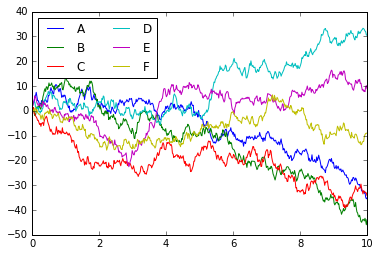

In [9]:
# 用 matplotlib 默认样式画图

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [11]:
import seaborn as sns
sns.set()

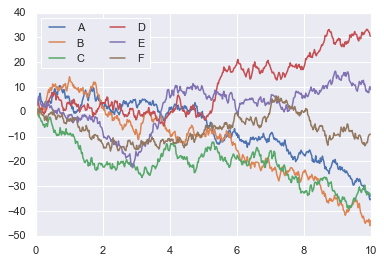

In [12]:
# 同样的画图代码

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### 4.16.2 seabron 图形介绍

#### 1. 频次直方图、KDE和密度图

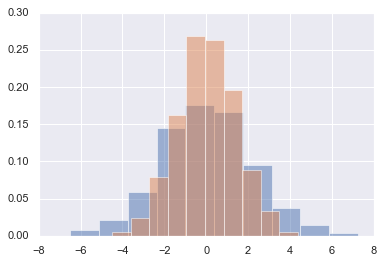

In [19]:
data = np.random.multivariate_normal([0,0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

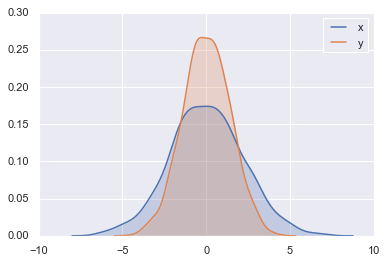

In [20]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

In [21]:
sns.kdeplot?

用 distplot 可以让频次直方图与 KDE 结合起来

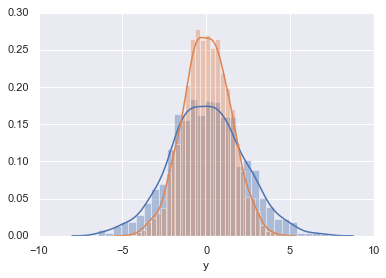

In [22]:
sns.distplot(data['x'])
sns.distplot(data['y'])

如果向 kdeplot 输入的是二维数据集，就可以获得一个二维数据可视化图

d:\Users\liu59\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


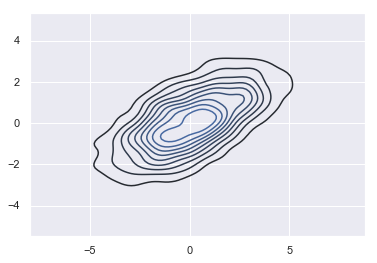

In [24]:
sns.kdeplot(data)

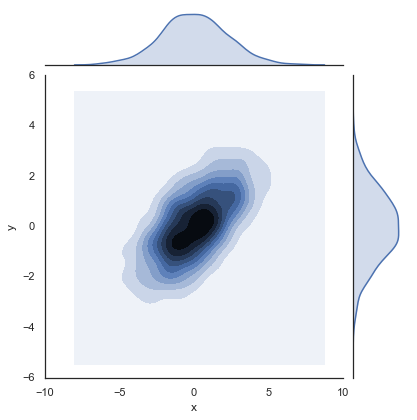

In [26]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

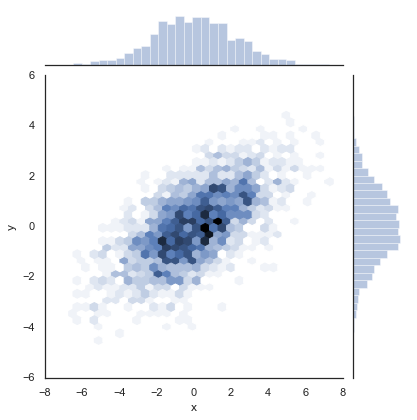

In [27]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

#### 2. 矩阵图

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


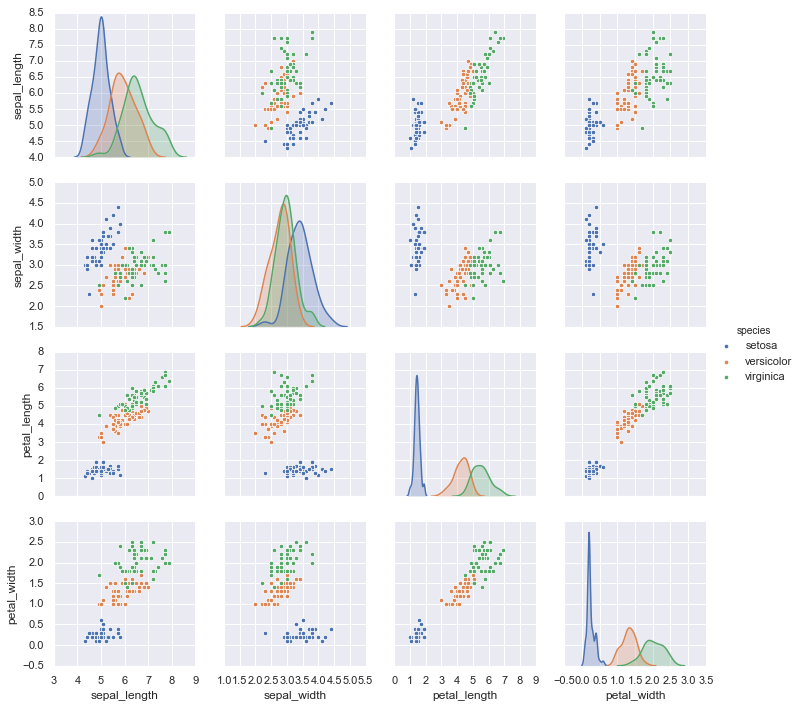

In [30]:
sns.pairplot(iris, hue='species', height=2.5)

#### 3. 分面频次直方图

In [31]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


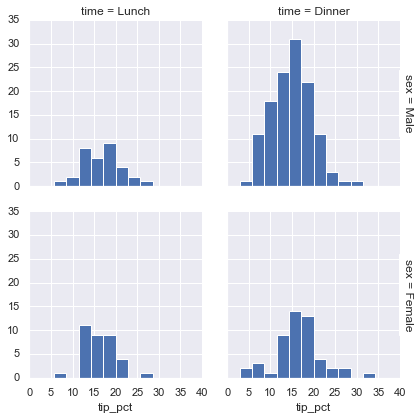

In [33]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))